# Blues - Blues Artists by State of Origin 

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
# Get top 100 blues players 1940-1979 and their origins
url='https://en.wikipedia.org/wiki/List_of_blues_musicians'
df=pd.read_html(url)[3]
df.sample(3)

,Name,Birthyear,Deathyear,Origin,Primary style,Ref(s)
94,Howlin' Wolf,1910,1976,Mississippi,Chicago blues,[212]
23,Texas Johnny Brown,1928,2013,Mississippi,Electric blues,[20]
198,Eddie Taylor,1923,1985,Mississippi,Chicago blues,[303]


In [4]:
df

,Name,Birthyear,Deathyear,Origin,Primary style,Ref(s)
0,The Aces,NaN,NaN,Illinois,Chicago blues,[129]
1,Woodrow Adams,1917,1988,Mississippi,Electric blues,[130]
2,Luther Allison,1939,1997,Arkansas,Chicago blues,[131]
3,Mose Allison,1927,2016,Mississippi,Urban blues,[132]
4,Kip Anderson,1938,2007,South Carolina,Soul blues,[133]
...,...,...,...,...,...,...
229,Jimmy Witherspoon,1920,1997,Arkansas,Jump blues,[325]
230,Big John Wrencher,1924*,1977,Mississippi,Chicago blues,[327]
231,Billy Wright,1918*,1991,Georgia,Jump blues,[328]
232,"Johnny ""Man"" Young",1918,1974,Mississippi,Chicago blues,[329]


In [5]:
# Group by state
dfS=df.Origin.value_counts().reset_index()
dfS.columns=['init','num']
dfS['clean']=dfS.init.apply(lambda x: x.replace("*",""))
dfS[:3]

,init,num,clean
0,Mississippi,77,Mississippi
1,Louisiana,33,Louisiana
2,Texas,24,Texas


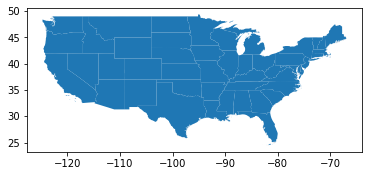

In [6]:
# Downlaod US geography from https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html
gdf=gpd.read_file('C:\GIS/usstates/cb_2018_us_state_500k.shp', encoding='utf-8')
gdfUS=gdf.cx[-125:-50,25:60]
gdfUS.plot()

In [7]:
# Join stats to geography
gdfRes=gdfUS.merge(dfS,left_on='NAME',right_on='clean',how='left').fillna(0).sort_values('num',ascending=False)
gdfRes[:5]

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,init,num,clean
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",Mississippi,77.0,Mississippi
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ...",Louisiana,33.0,Louisiana
14,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"MULTIPOLYGON (((-94.71830 29.72885, -94.71721 ...",Texas,24.0,Texas
46,05,00068085,0400000US05,05,AR,Arkansas,00,134768872727,2962859592,"POLYGON ((-94.61783 36.49941, -94.61765 36.499...",Arkansas,20.0,Arkansas
16,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ...",Alabama,14.0,Alabama


In [8]:
# Change projection 
gdfRes=gdfRes.to_crs({'init': 'epsg:2163'})

C:\Users\brian price\AppData\Roaming\Python\Python37\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


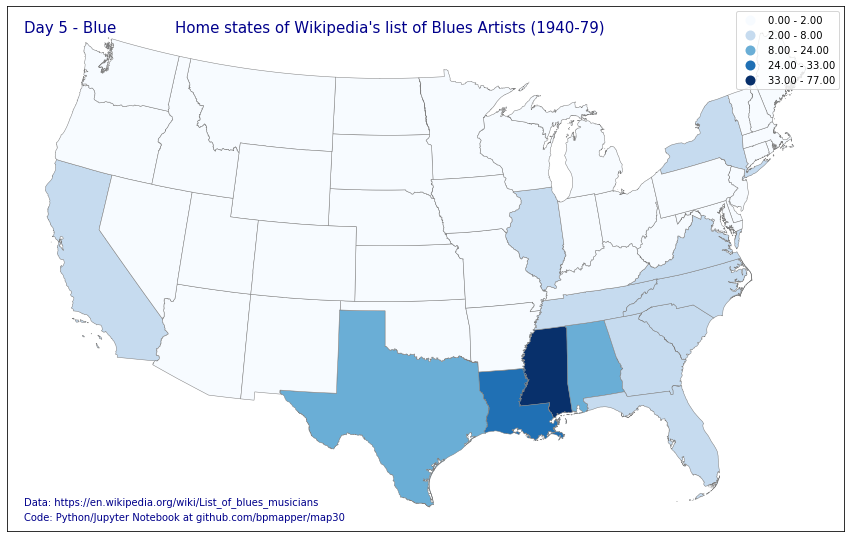

In [11]:
# Plot map
fig, ax=plt.subplots(figsize=(15,15))
gdfRes.plot(ax=ax, column='num', scheme='fisherjenks', cmap='Blues',edgecolor='grey',linewidth=0.5, legend=True)


textcol='darkblue'
ax.text(.02,.95,'Day 5 - Blue',transform=ax.transAxes, fontsize=15).set_color(textcol)
ax.text(.20,.95,'Home states of Wikipedia\'s list of Blues Artists (1940-79)',transform=ax.transAxes, fontsize=15).set_color(textcol)       


ax.text(.02,.05,'Data: https://en.wikipedia.org/wiki/List_of_blues_musicians',transform=ax.transAxes, fontsize=10).set_color(textcol)       
ax.text(.02,.02,'Code: Python/Jupyter Notebook at github.com/bpmapper/map30',transform=ax.transAxes, fontsize=10).set_color(textcol)       

plt.tick_params(axis='both',which='both',bottom=False,left=False,labelbottom=False,labelleft=False)
plt.show()
fig.savefig('Day05_Blue.png')

#dict_keys(['boxplot', 'equalinterval', 'fisherjenks', 'fisherjenkssampled', 'headtailbreaks', 'jenkscaspall', 'jenkscaspallforced', 'jenkscaspallsampled', 'maxp', 'maximumbreaks', 'naturalbreaks', 'quantiles', 'percentiles', 'stdmean', 'userdefined']
